A beginner solution to the adult census income classification problem using decision trees and random forests in R. The decision tree can also be boosted using any of the following gbm boost, ada boost or xg boost. If you found this notebook helpful , please do upvote :)
Also if there are any suggestions or improvements to be made, do mention them.
Thanks in advance.

# Decision Tree and Random Forest for classification of income.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "adult-census-income"

# 1. Import dataset and check the summary of data

In [2]:
adult <- read.csv("../input/adult-census-income/adult.csv", header = TRUE)
summary(adult)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education.num                 marital.status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

* Numeric data - age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week
* Character data - workclass, education, marital-status, occupation, relationship, race, sex, native-country, income

# 2. Change all "?" to NA
for better interpretation of missing values

In [3]:
df2 <- adult
df2[df2 == "?"] <- NA
adult <- df2
rm(df2)
print("Done")

[1] "Done"


# 3. change all character variables to categorical variables
workclass, education, marital-status, occupation, relationship, race, sex, native-country and income

In [4]:
adult$workclass <- as.factor(adult$workclass)
adult$education <- as.factor(adult$education)
adult$marital.status <- as.factor(adult$marital.status)
adult$occupation <- as.factor(adult$occupation)
adult$relationship <- as.factor(adult$relationship)
adult$race <- as.factor(adult$race)
adult$sex <- as.factor(adult$sex)
adult$native.country <- as.factor(adult$native.country)
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: NA 5 NA 5 5 5 5 8 2 5 ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 216864 150601 88638 422013 70037 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 12 12 16 6 16 12 1 11 12 16 ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 7 7 7 1 6 1 6 5 1 5 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: NA 5 NA 8 11 9 2 11 11 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 2 5 5 4 5 5 3 2 5 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 3 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 2 1 1 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ ho

# 4. change the output variable income "<=50k" to 0 and ">50k" to 1

In [5]:
adult$income <- as.factor(adult$income)
library(plyr)
adult$income <- mapvalues(adult$income, from = c('>50K','<=50K'), to = c(1,0))

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




In [6]:
str(adult$income)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 2 ...


# 5. Analyze the histograms and scatter plots
to understand the importance of variables and the distribution of data

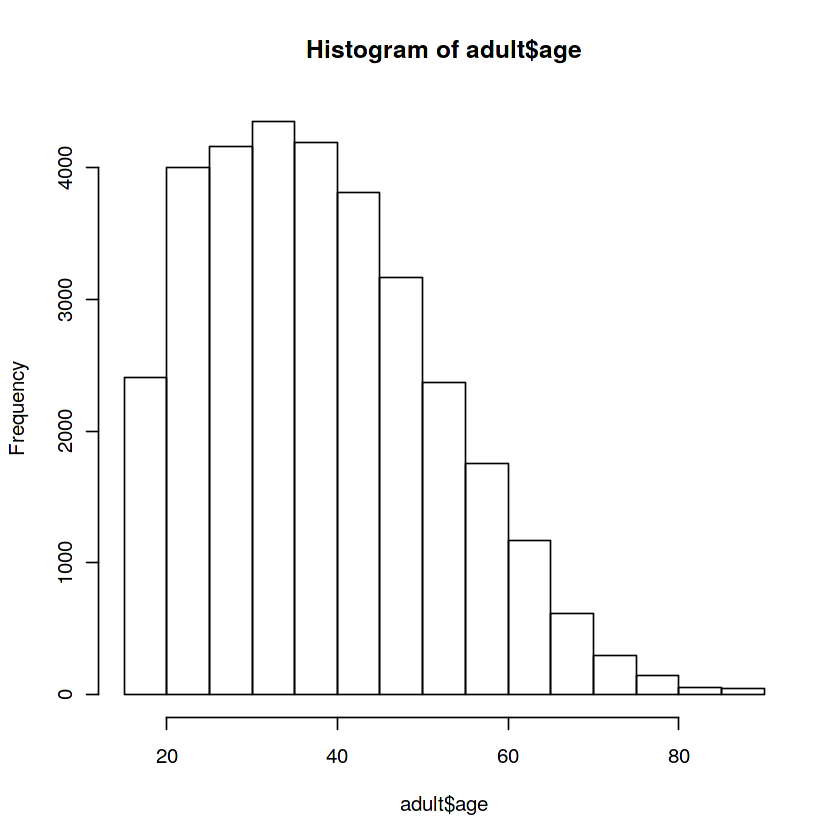

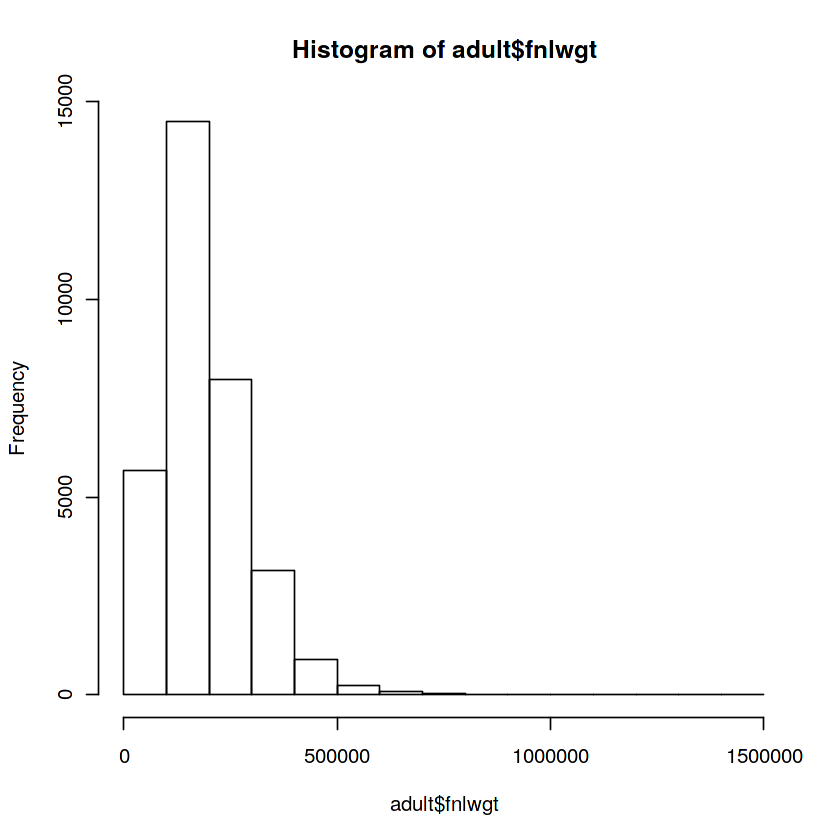

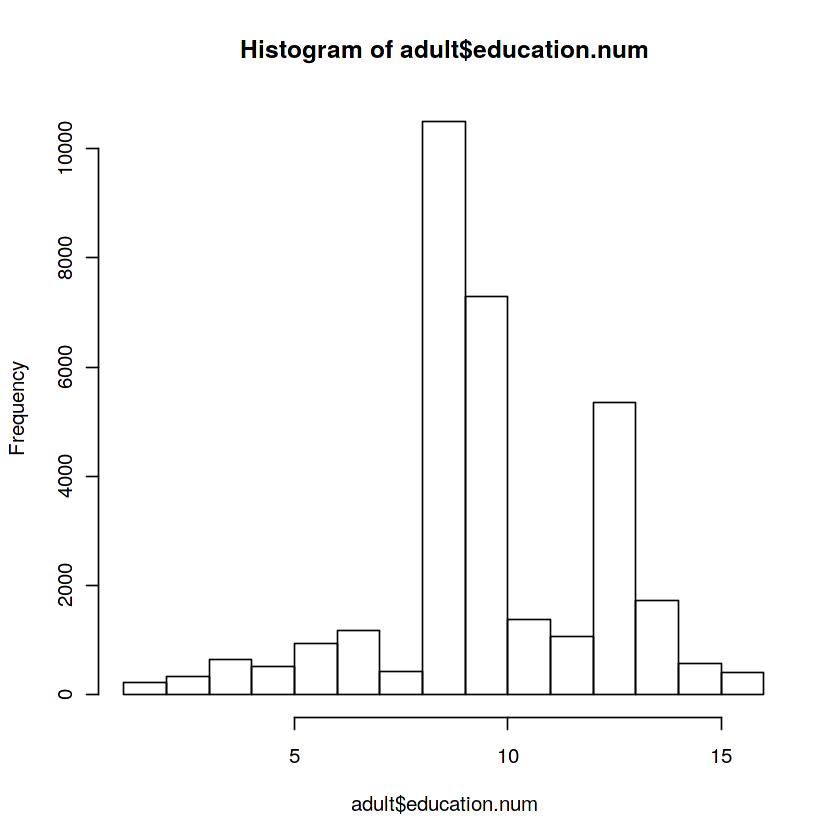

In [7]:
hist(adult$age)
hist(adult$fnlwgt)
hist(adult$education.num)

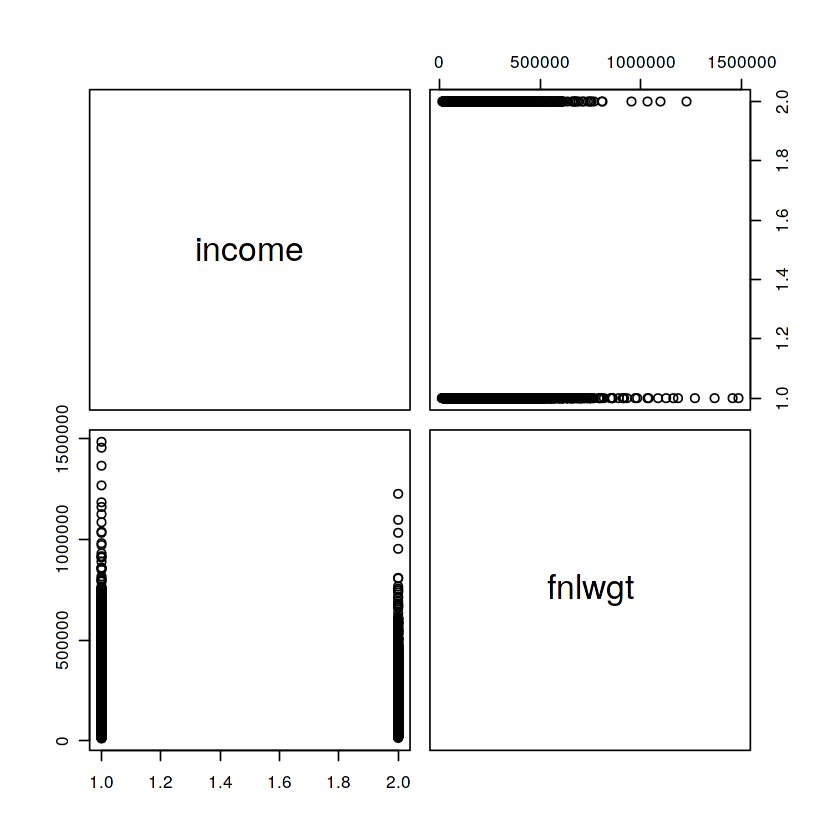

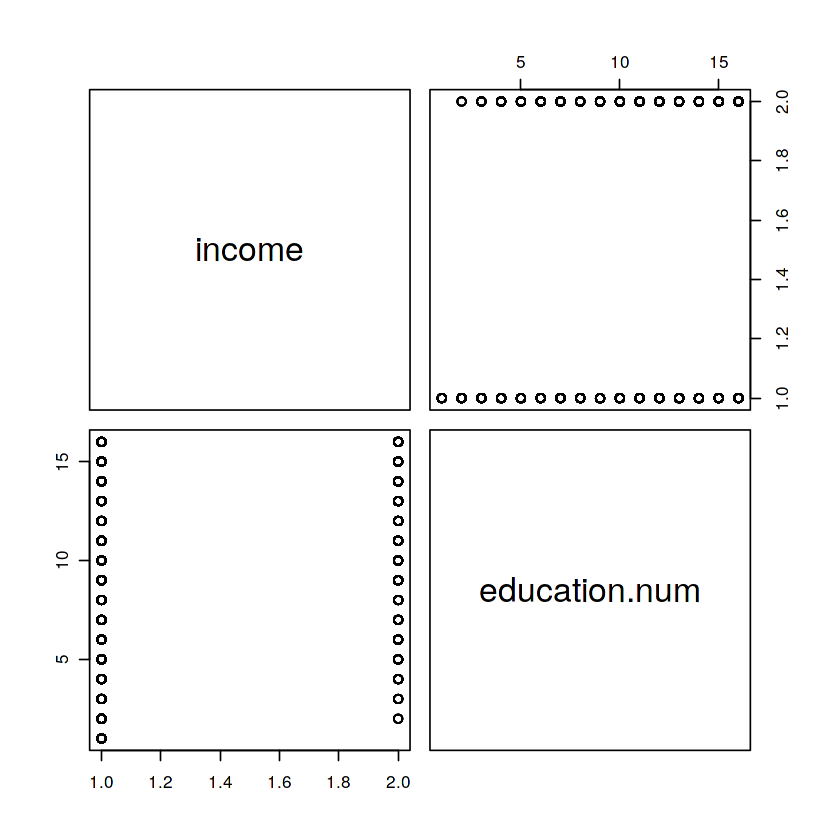

In [8]:
pairs(~income + fnlwgt, data = adult) # fnlwgt can be ignored
pairs(~income + education.num, data = adult) # education.num can be ignored

Since education.num and education provide similar information , education.num can be ignored.
Since fnlwgt does not make much of a business sense in prediction of income, we ignore the same.

# 6. remove unwanted columns - fnlwgt and education.num

In [9]:
adult <- adult[,-3] # remove fnlwgt

In [10]:
adult <- adult[,-4] # remove education.num

In [11]:
str(adult)

'data.frame':	32561 obs. of  13 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: NA 5 NA 5 5 5 5 8 2 5 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 12 12 16 6 16 12 1 11 12 16 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 7 7 7 1 6 1 6 5 1 5 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: NA 5 NA 8 11 9 2 11 11 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 2 5 5 4 5 5 3 2 5 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 3 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 2 1 1 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.per.week: int  40 18 40 40 40 45 40 20 40 60 ...
 $ native.country: Factor w/ 42 levels "?","Cambodia",..: 40 40 40 40 40 40 40 40 40 NA ...
 $

# 7. dealing with missing values

Getting the percentage of missing values

In [12]:
sum(is.na(adult$workclass) == TRUE)/32561
sum(is.na(adult$occupation) == TRUE)/32561
sum(is.na(adult$native.country) == TRUE)/32561

[1] 0.05638647

[1] 0.05660146

[1] 0.01790486

Since the percentage of missing values are very less compared to number of observations we will drop the rows.
Remove NA rows from workclass and occupation columns.

In [13]:
adult <- adult[!is.na(adult$workclass),]
# 30725 rows

In [14]:
sum(is.na(adult$occupation) == TRUE) # 7 rows with NA for occupation to be deleted
adult <- adult[!is.na(adult$occupation),]
# 30718 rows

[1] 7

In [15]:
sum(is.na(adult$native.country) == TRUE) # 556 rows with NA for native.country

[1] 556

For the native.country column which is a categorical variable, the missing values can be replaced with the mode.

In [16]:
adult$native.country[is.na(adult$native.country)] <- names(which.max(table(adult$native.country)))

# 8. Splitting the dataset into train set and test set

In [17]:
library("caTools")
set.seed(42)
split <- sample.split(adult, SplitRatio = 0.7) # 70:30
train <- subset(adult, split == TRUE)
test <- subset(adult, split == FALSE)

In [18]:
str(train)
str(test)

'data.frame':	21267 obs. of  13 variables:
 $ age           : int  41 38 74 68 41 45 38 52 32 22 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 5 5 8 2 5 5 7 5 5 5 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 16 1 11 12 16 11 15 10 13 8 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 6 6 5 1 5 1 5 7 6 5 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 11 2 11 11 4 11 11 9 5 7 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 4 5 3 2 5 5 2 2 2 2 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 5 5 3 5 5 5 3 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 2 1 1 2 1 2 1 2 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  3900 3770 3683 3683 3004 3004 2824 2824 2824 2824 ...
 $ hours.per.week: int  40 40 20 40 60 35 45 20 55 40 ...
 $ native.country: Factor w/ 42 levels "?","Cambodia",..: 40 40 40 40 40 40 40 40 40 40 ...
 $ i

# 9. Training the model - decision tree

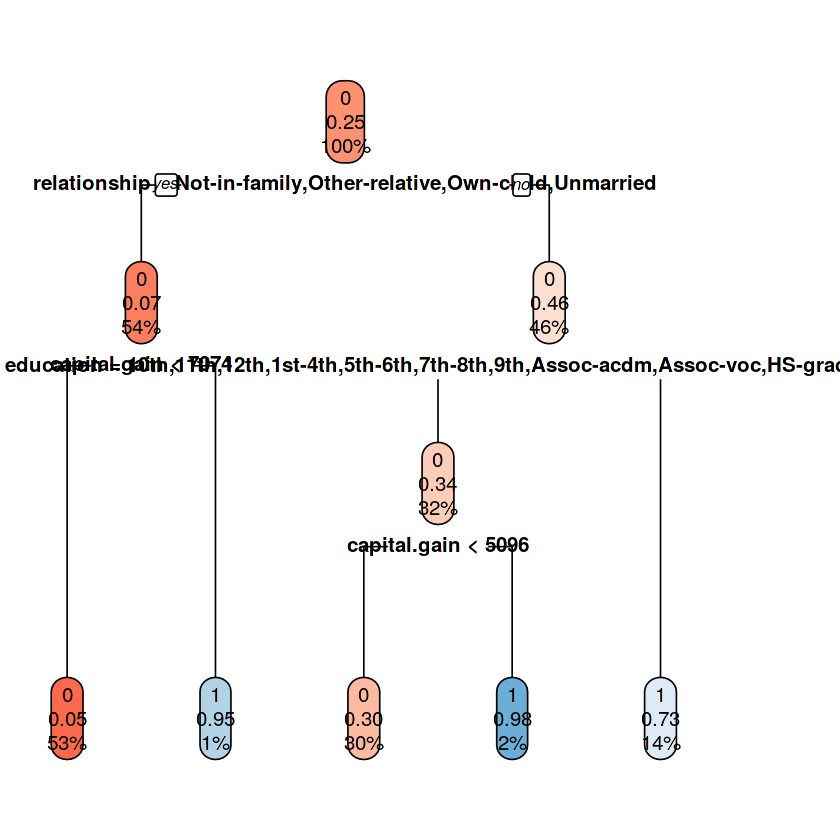

In [19]:
library("rpart")
library("rpart.plot")
# build decision tree with train set and method as "class" for classification
decision_tree <- rpart(formula = income~., data = train, method = "class")
# plot the decision tree
rpart.plot(decision_tree, box.palette = 'RdBu')

# 10. Predict the income for test set

In [20]:
test$predicted.income <- predict(decision_tree, test, type = "class")

We evaluate the decision tree model using the confusion matrix and accuracy metrics

In [21]:
confMat <- table(test$predicted.income, test$income)
accuracy <- sum(diag(confMat))/sum(confMat)
print("Confusion matrix")
confMat
print("Accuracy:")
accuracy

[1] "Confusion matrix"


   
       0    1
  0 6740 1169
  1  350 1192

[1] "Accuracy:"


[1] 0.8392763

The decision tree model gives an accuracy of nearly 84% on the test set.

# 11. Building a Random Forest
Random Forests are formed by a collection of decision trees on randomly selected samples of the train set. It selects the mode of the classes from all the decision trees. Random forests overcome the problem of overfitting the train set which is a commom problem in case of decision trees.

In [22]:
library("randomForest")
random_forest <- randomForest(income~., data = train, method = "class", ntree = 500, do.trace = 100)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




ntree      OOB      1      2
  100:  14.27%  7.37% 35.09%
  200:  14.05%  7.24% 34.64%
  300:  14.12%  7.30% 34.69%
  400:  14.17%  7.26% 35.05%
  500:  14.09%  7.22% 34.86%


Predict income of test set using random forest

In [23]:
test$rf.predicted.income <- predict(random_forest, test, type = "class")

We evaluate the random forest model using confusion matrix and accuracy

In [24]:
rfconfMat <- table(test$rf.predicted.income, test$income)
rfaccuracy <- sum(diag(rfconfMat))/sum(rfconfMat)
print("Confusion matrix for random forest")
rfconfMat
print("Accuracy of random forest:")
rfaccuracy

[1] "Confusion matrix for random forest"


   
       0    1
  0 6594  829
  1  496 1532

[1] "Accuracy of random forest:"


[1] 0.8598032

The random forest gives an accuracy of nearly 86%.

# 12. Plotting ROC curves and getting AUC for decision tree and random forest.
An ROC curve (Receiver Operating Characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. It plots the True positive rate and False positive rate. The ROC curve should be close to the upper left corner for a good classifier.
AUC (Area Under Curve) is the measure of the ability of a classifier to distinguish between classes. 
For more information and a detailed explanation of ROC and AUC, visit https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc 

We will be using the "pROC" package for plotting ROC curves

In [25]:
library("pROC")

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



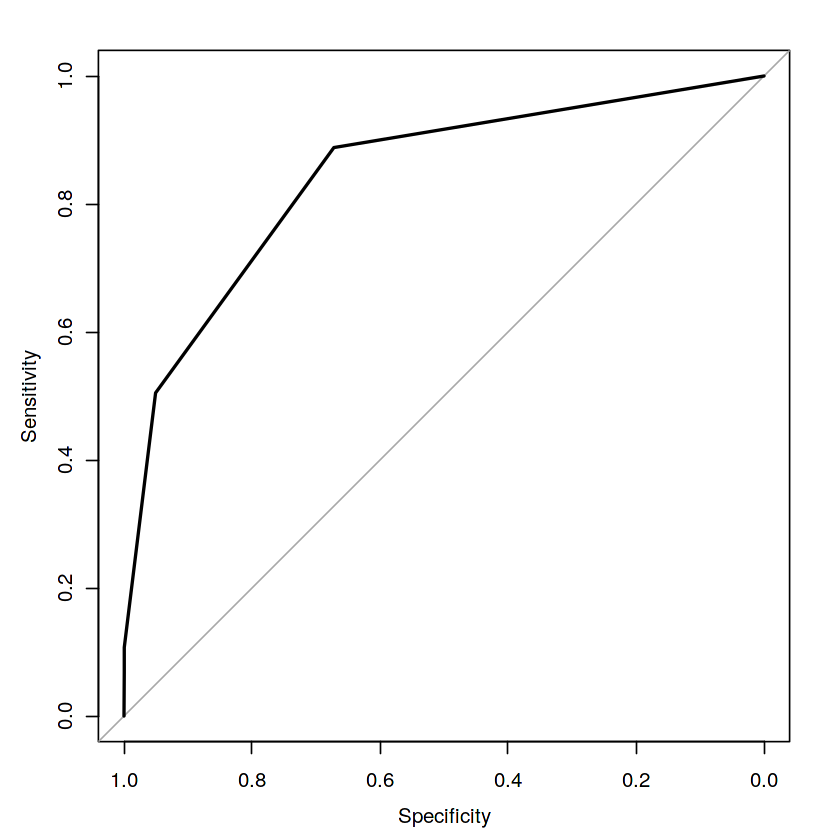

In [26]:
# i. decision tree
predictionprobs <- predict(decision_tree, test, type = "prob")
auc <- auc(test$income,predictionprobs[,2])
# Area under the curve: 0.8435
plot(roc(test$income,predictionprobs[,2]))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



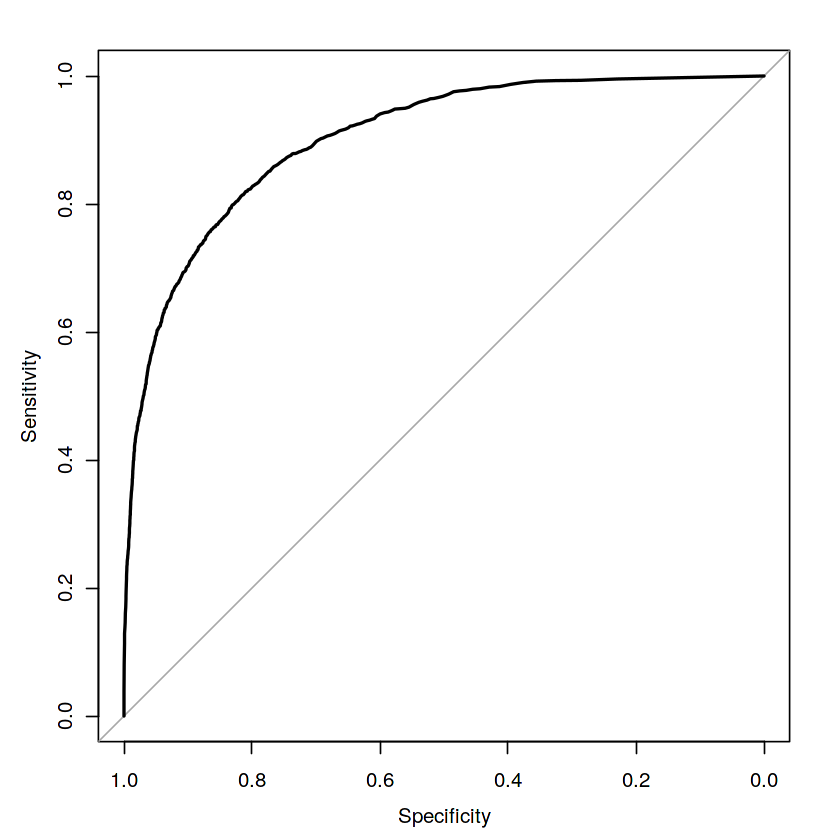

In [27]:
# ii. random forest
rfpredictionprobs <- predict(random_forest, test, type = "prob")
rfauc <- auc(test$income,rfpredictionprobs[,2])
# Area under the curve: 0.9018
plot(roc(test$income,rfpredictionprobs[,2]))